# **Deep Reinforcement Learning for Automated Testing**

To explore automated application testing with deep reinforcement learning (DRL), two types of agents were trained using **PPO (Proximal Policy Optimization)** and **A2C (Advantage Actor-Critic)** algorithms in a custom "Bubble Game" environment. The reward function provided incentives for desired behaviours, such as: shooting (regardless of hitting a target), aligning with targets,
sucessfully shooting targets. While penalizing undesirable actions such as colliding with targets, idling, and wall-camping. 

Two reward configurations were designed to operationalize distinct testing strategies. **Survivor mode** prioritizes conservative navigation and sustained episode length by imposing heavier penalties on risky actions, whereas **Speedrunner** mode incentivizes aggressive, high-throughput interaction via larger rewards for rapid bubble pops and frequent movement.

To ensure fair and reproducible comparisons, four models were trained in a virtual environment under an identical random seed, with matched environment settings and hyperparameters. Following training, a dedicated evaluation script recorded performance metrics, which were parsed into a CSV file for this analysis.

#### **Imports**

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [141]:
ppo_survivor_df = pd.read_csv('logs/ppo_survivor_seed7.csv')
ppo_speedrunner_df = pd.read_csv('logs/ppo_speedrunner_seed7.csv')
a2c_survivor_df = pd.read_csv('logs/a2c_survivor_seed7.csv')
a2c_speedrunner_df = pd.read_csv('logs/a2c_speedrunner_seed7.csv')

### **Bubble Game: Survivor Mode (PPO) v. Speedrunner Mode (PPO)**

#### **Reward**

Comparing rewards between PPO in **Survivor Mode** and **Speedrunner** Mode shows that rewards in **Survivor Mode** remained relatively stable, with occasional small increases across episodes. In contrast, Speedrunner Mode produced significantly higher rewards, particularly in the later episodes, where the reward increased sharply. Some episodes in Speedrunner Mode saw rewards up to **400% greater than** in Survivor Mode. This illustrates the high-risk, high-reward nature of Speedrunner Mode, where aggressive actions are rewarded more heavily, though with higher variability. The model in Speedrunner Mode benefited from rapid interactions, which resulted in higher rewards but more fluctuating performance. Conversely, Survivor Mode's focus on longevity kept the rewards relatively consistent but much lower, reflecting its more cautious and conservative approach.

<Figure size 1000x600 with 0 Axes>

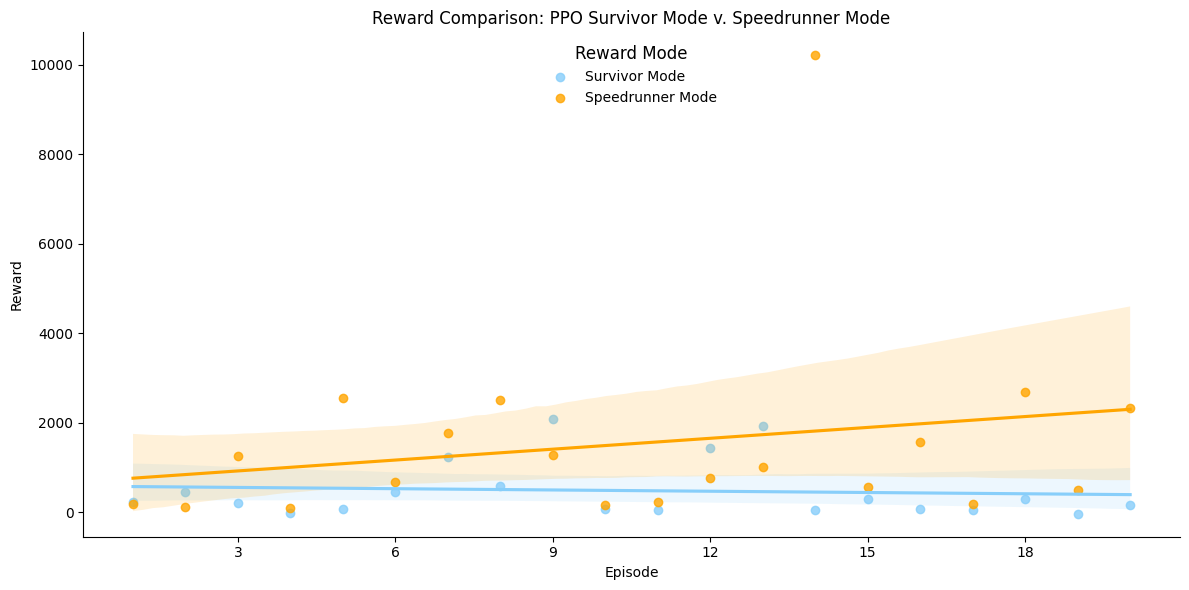

In [146]:
ppo_survivor_df['Mode'] = 'Survivor Mode'
ppo_speedrunner_df['Mode'] = 'Speedrunner Mode'

combined_data = pd.concat([ppo_survivor_df[['episode', 'reward', 'Mode']],
                           ppo_speedrunner_df[['episode', 'reward', 'Mode']]])

plt.figure(figsize=(10, 6))
sns.lmplot(x='episode', y='reward', hue='Mode', data=combined_data, aspect=2, height=6,
           palette={'Survivor Mode': 'lightskyblue', 'Speedrunner Mode': 'orange'},
           legend=False)  

# Customize the x-axis to show only whole numbers
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('Reward Comparison: PPO Survivor Mode v. Speedrunner Mode')
plt.xlabel('Episode')
plt.ylabel('Reward')

plt.legend(title='Reward Mode', loc='upper center', bbox_to_anchor=(0.5, 1.00), frameon=False, title_fontsize='large')

plt.tight_layout()
plt.show()

### **Speedrunner Mode (PPO) vs. Speedrunner Mode (A2C)**

#### **Reward**

Comparing **PPO** and **A2C** in Speedrunner Mode demonstrates that PPO consistently achieved higher rewards than A2C, with some episodes in PPO producing rewards up to **500% greater than** those in A2C. The PPO agent showed notable spikes in rewards, particularly **around episodes 12 and 15**, indicating that PPO was able to capitalize on rapid, high-reward opportunities. A2C, on the other hand, exhibited much steadier performance but at much lower reward levels. The A2C agent showed minimal reward fluctuations, suggesting that its more conservative approach led to less variability in performance, but it struggled to reach the high peaks achieved by PPO. This highlights that PPO's aggressive exploration and focus on maximizing rewards outperformed A2C's more stable, but lower-performing strategy in Speedrunner Mode.

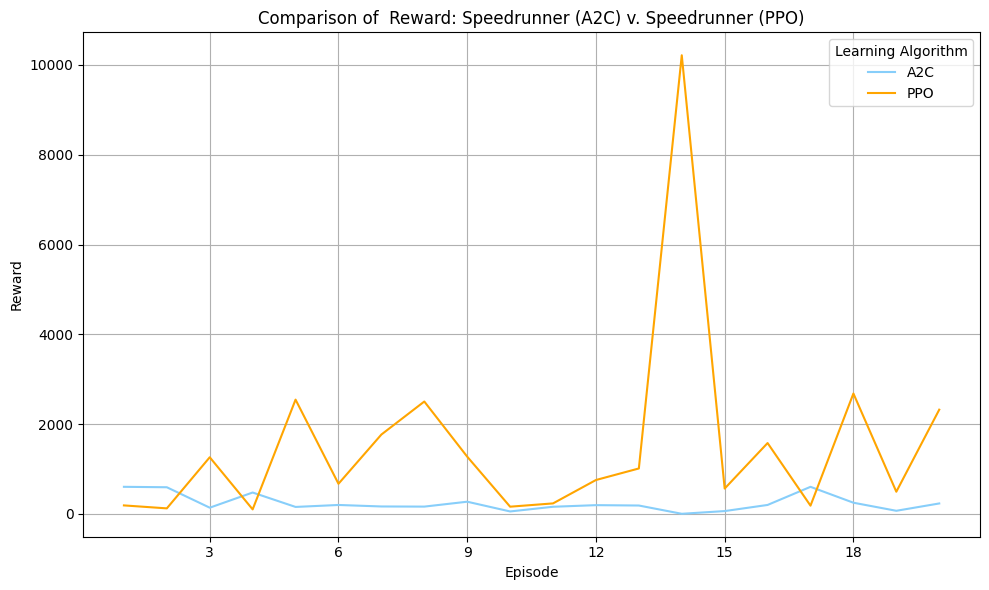

In [150]:
a2c_episode = a2c_speedrunner_df['episode']
a2c_reward = a2c_speedrunner_df['reward']

ppo_episode = ppo_speedrunner_df['episode']
ppo_reward = ppo_speedrunner_df['reward']

plt.figure(figsize=(10, 6))

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(a2c_episode, a2c_reward, label='A2C', color='lightskyblue')  
plt.plot(ppo_episode, ppo_reward, label='PPO', color='orange')  

plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Comparison of  Reward: Speedrunner (A2C) v. Speedrunner (PPO)')

plt.legend(title='Learning Algorithm')

plt.grid(True)
plt.tight_layout()
plt.show()

### **Tensorboard Monitoring**

#### **Episode Length Comparision: PPO v. A2C in Survivor and Speedrunner Modes**

This graph illustrates the evolution of **episode length** (duration of agent activity during each episode) for **PPO** and **A2C** agents across both **Survivor** and **Speedrunner** modes. 

**PPO in Speedrunner Mode** (green line) shows the **most dramatic descrease** in episode length over time, demonstrating the agent is successfully learning to complete tasks much faster as it refines its strategy.
**A2C in Speedrunner Mode** (orange line) also decreases episode length but at a slower rate compared to PPO, suggesting that while the agent is becoming more efficient, it is not as fast as PPO.
**PPO in Survivor Mode** (red line) starts with longer episode lengths but eventually decreases at a moderate rate, showing that its strategy focused on survival rather than speed; demonstrating the main goal of the Survivor mode. 
**A2C in Survivor Mode** (blue line) shows the **slowest** decline in episode length, indicating a more cautious approach to completing episodes that emphasizes longevity over quick task completion.

<img src="screenshots/first-rollout_ep_len_mean.png" style="width: 1200px; height:224" >